# Capstone project - The Battle of Neighborhoods

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
import urllib.request

# Retrieve and clean data for Singapore

In [3]:
url = 'https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore'

In [4]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [5]:
# import the BeautifulSoup library
from bs4 import BeautifulSoup

In [6]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Planning Areas of Singapore - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"28d396fb-8868-4485-b948-2f2600f2df38","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Planning_Areas_of_Singapore","wgTitle":"Planning Areas of Singapore","wgCurRevisionId":972441300,"wgRevisionId":972441300,"wgArticleId":2224605,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using deprecated image syntax","Urban planning in Singapore","Subdivisions of Singapore"],"wgPageConten

In [8]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=soup.find_all("table")

all_tables

[<table class="infobox vevent" style="width:22em;float: right; width: 250px; font-size: 90%; text-align: left; border-spacing: 3px;"><tbody><tr><th class="summary" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 130%; background-color: #F0F0F0; vertical-align: middle">Planning Areas of Singapore</th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Singapore_MP2008._Urban_Planning_Areas.svg"><img alt="Singapore MP2008. Urban Planning Areas.svg" data-file-height="452" data-file-width="710" decoding="async" height="191" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/300px-Singapore_MP2008._Urban_Planning_Areas.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.svg/450px-Singapore_MP2008._Urban_Planning_Areas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Singapore_MP2008._Urban_Planning_Areas.sv

In [9]:
right_table=soup.find('table', class_='wikitable sortable')

right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Name <small>(<a href="/wiki/English_language" title="English language">English</a>)</small>
</th>
<th><a href="/wiki/Malay_language" title="Malay language">Malay</a>
</th>
<th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
</th>
<th><a href="/wiki/Pinyin" title="Pinyin">Pinyin</a>
</th>
<th><a href="/wiki/Tamil_language" title="Tamil language">Tamil</a>
</th>
<th>Region
</th>
<th>Area (km2)
</th>
<th>Population<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Density (/km2)
</th></tr>
<tr>
<td><a href="/wiki/Ang_Mo_Kio" title="Ang Mo Kio">Ang Mo Kio</a>
</td>
<td>
</td>
<td>宏茂桥
</td>
<td>Hóng mào qiáo
</td>
<td>ஆங் மோ கியோ
</td>
<td><a href="/wiki/North-East_Region,_Singapore" title="North-East Region, Singapore">North-East</a>
</td>
<td>13.94
</td>
<td>163,950
</td>
<td>13,400
</td></tr>
<tr>
<td><a href="/wiki/Bedok" title="Bedok">Bedok</a>
</td>
<td>*
</td>
<td>勿洛
</td>
<td>

In [10]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]


for row in right_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==9:

        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))


In [11]:
df=pd.DataFrame(A,columns=['Neighborhood'])

df['Malay']=B

df['Chinese']=C
df['Pinyin']=D
df['Tamil']=E
df['Region']=F
df['Area']=G
df['Population']=H
df['Density']=I
df

Neighborhood                         Malay  Chinese  \
0                Ang Mo Kio                            \n    宏茂桥\n   
1                     Bedok                           *\n     勿洛\n   
2                    Bishan                            \n     碧山\n   
3                  Boon Lay                            \n     文礼\n   
4               Bukit Batok                           *\n   武吉巴督\n   
5               Bukit Merah                           *\n     红山\n   
6             Bukit Panjang                           *\n   武吉班让\n   
7               Bukit Timah                           *\n   武吉知马\n   
8   Central Water Catchment  Kawasan Tadahan Air Tengah\n  中央集水区\n   
9                    Changi                           *\n     樟宜\n   
10               Changi Bay                Teluk Changi\n    樟宜湾\n   
11            Choa Chu Kang                            \n    蔡厝港\n   
12                 Clementi                            \n    金文泰\n   
13            Downtown Core                Pusat Bandar\n    市中心\n   
14                  Geylang                           *\n     芽笼\n   
15                  Hougang                            \n     后港\n   
16              Jurong East                Jurong Timur\n    裕廊东\n   
17              Jurong West                Jurong Barat\n    裕廊西\n   
18                  Kallang                           *\n     加冷\n   
19             Lim Chu Kang                            \n    林厝港\n   
20                   Mandai                            \n     万礼\n   
21              Marina East                Marina Timur\n    滨海东\n   
22             Marina South              Marina Selatan\n    滨海南\n   
23            Marine Parade                            \n   马林百列\n   
24                   Museum                      Muzium\n    博物馆\n   
25                   Newton                            \n     纽顿\n   
26    North-Eastern Islands        Kepulauan Timur Laut\n   东北群岛\n   
27                   Novena                            \n    诺维娜\n   
28                  Orchard                            \n     乌节\n   
29                   Outram                            \n     欧南\n   
30                Pasir Ris                           *\n    巴西立\n   
31               Paya Lebar                           *\n   巴耶利峇\n   
32                  Pioneer                            \n     先驱\n   
33                  Punggol                            \n     榜鹅\n   
34               Queenstown                            \n    女皇镇\n   
35             River Valley                            \n   里峇峇利\n   
36                   Rochor                            \n     梧槽\n   
37                  Seletar                           *\n    实里达\n   
38                Sembawang                           *\n    三巴旺\n   
39                 Sengkang                            \n     盛港\n   
40                Serangoon                           *\n    实龙岗\n   
41                  Simpang                           *\n     新邦\n   
42          Singapore River            Sungai Singapura\n   新加坡河\n   
43         Southern Islands           Kepulauan Selatan\n   南部群岛\n   
44             Straits View           Pemandangan Selat\n    海峡景\n   
45             Sungei Kadut                Sungai Kadut\n   双溪加株\n   
46                 Tampines                           *\n    淡滨尼\n   
47                  Tanglin                            \n     东陵\n   
48                   Tengah                           *\n     登加\n   
49                Toa Payoh                            \n    大巴窑\n   
50                     Tuas                            \n     大士\n   
51          Western Islands             Kepulauan Barat\n   西部群岛\n   
52  Western Water Catchment   Kawasan Tadahan Air Barat\n  西部集水区\n   
53                Woodlands                            \n     兀兰\n   
54                   Yishun                            \n     义顺\n   

                    Pinyin                               Tamil      Region  \
0          Hóng 

In [12]:
df_singapore=df.drop(['Malay', 'Chinese','Pinyin', 'Tamil', 'Area','Population', 'Density','Region'],axis=1).reset_index(drop=True)
df_singapore['City'] = 'Singapore'

In [13]:
df_singapore

Neighborhood       City
0                Ang Mo Kio  Singapore
1                     Bedok  Singapore
2                    Bishan  Singapore
3                  Boon Lay  Singapore
4               Bukit Batok  Singapore
5               Bukit Merah  Singapore
6             Bukit Panjang  Singapore
7               Bukit Timah  Singapore
8   Central Water Catchment  Singapore
9                    Changi  Singapore
10               Changi Bay  Singapore
11            Choa Chu Kang  Singapore
12                 Clementi  Singapore
13            Downtown Core  Singapore
14                  Geylang  Singapore
15                  Hougang  Singapore
16              Jurong East  Singapore
17              Jurong West  Singapore
18                  Kallang  Singapore
19             Lim Chu Kang  Singapore
20                   Mandai  Singapore
21              Marina East  Singapore
22             Marina South  Singapore
23            Marine Parade  Singapore
24                   Museum  Singapore
25                   Newton  Singapore
26    North-Eastern Islands  Singapore
27                   Novena  Singapore
28                  Orchard  Singapore
29                   Outram  Singapore
30                Pasir Ris  Singapore
31               Paya Lebar  Singapore
32                  Pioneer  Singapore
33                  Punggol  Singapore
34               Queenstown  Singapore
35             River Valley  Singapore
36                   Rochor  Singapore
37                  Seletar  Singapore
38                Sembawang  Singapore
39                 Sengkang  Singapore
40                Serangoon  Singapore
41                  Simpang  Singapore
42          Singapore River  Singapore
43         Southern Islands  Singapore
44             Straits View  Singapore
45             Sungei Kadut  Singapore
46                 Tampines  Singapore
47                  Tanglin  Singapore
48                   Tengah  Singapore
49                Toa Payoh  Singapore
50                     Tuas  Singapore
51          Western Islands  Singapore
52  Western Water Catchment  Singapore
53                Woodlands  Singapore
54                   Yishun  Singapore

In [14]:
neighborhoods = df_singapore['Neighborhood']
hood_number = 0
for hood in neighborhoods:
    geolocator = Nominatim(user_agent='karenleeyt_project')
    location = geolocator.geocode('{} Singapore'.format(hood))

    df_singapore.loc[hood_number,'Latitude'] = location[1][0]
    df_singapore.loc[hood_number,'Longitude'] = location[1][1]
    hood_number = hood_number + 1

latitude = location.latitude
longitude = location.longitude
df_singapore

Neighborhood       City  Latitude   Longitude
0                Ang Mo Kio  Singapore  1.370080  103.849523
1                     Bedok  Singapore  1.323976  103.930216
2                    Bishan  Singapore  1.350986  103.848255
3                  Boon Lay  Singapore  1.338550  103.705812
4               Bukit Batok  Singapore  1.349057  103.749591
5               Bukit Merah  Singapore  1.270439  103.828318
6             Bukit Panjang  Singapore  1.379149  103.761413
7               Bukit Timah  Singapore  1.354690  103.776372
8   Central Water Catchment  Singapore  1.375708  103.801743
9                    Changi  Singapore  1.351080  103.990064
10               Changi Bay  Singapore  1.316850  104.020649
11            Choa Chu Kang  Singapore  1.384749  103.744534
12                 Clementi  Singapore  1.315100  103.765231
13            Downtown Core  Singapore  1.287475  103.856033
14                  Geylang  Singapore  1.318186  103.887056
15                  Hougang  Singapore  1.370801  103.892544
16              Jurong East  Singapore  1.333108  103.742294
17              Jurong West  Singapore  1.339636  103.707339
18                  Kallang  Singapore  1.310759  103.866262
19             Lim Chu Kang  Singapore  1.434217  103.714987
20                   Mandai  Singapore  1.423535  103.803350
21              Marina East  Singapore  1.288624  103.869827
22             Marina South  Singapore  1.276998  103.861500
23            Marine Parade  Singapore  1.302689  103.907395
24                   Museum  Singapore  1.296052  103.847599
25                   Newton  Singapore  1.313183  103.838040
26    North-Eastern Islands  Singapore  1.382882  104.050726
27                   Novena  Singapore  1.320526  103.843881
28                  Orchard  Singapore  1.303427  103.831342
29                   Outram  Singapore  1.282870  103.837860
30                Pasir Ris  Singapore  1.373031  103.949255
31               Paya Lebar  Singapore  1.317480  103.892353
32                  Pioneer  Singapore  1.337588  103.697410
33                  Punggol  Singapore  1.405197  103.902350
34               Queenstown  Singapore  1.294623  103.806037
35             River Valley  Singapore  1.297582  103.836514
36                   Rochor  Singapore  1.303918  103.852789
37                  Seletar  Singapore  1.409849  103.877379
38                Sembawang  Singapore  1.449093  103.820055
39                 Sengkang  Singapore  1.391924  103.895491
40                Serangoon  Singapore  1.349761  103.873684
41                  Simpang  Singapore  1.445295  103.849743
42          Singapore River  Singapore  1.289178  103.845154
43         Southern Islands  Singapore  1.199182  103.760249
44             Straits View  Singapore  1.255708  103.862228
45             Sungei Kadut  Singapore  1.414997  103.753311
46                 Tampines  Singapore  1.354653  103.943571
47                  Tanglin  Singapore  1.306044  103.815280
48                   Tengah  Singapore  1.362453  103.725040
49                Toa Payoh  Singapore  1.335391  103.849741
50                     Tuas  Singapore  1.329372  103.648236
51          Western Islands  Singapore  1.250883  103.687883
52  Western Water Catchment  Singapore  1.366452  103.681031
53                Woodlands  Singapore  1.436897  103.786216
54                   Yishun  Singapore  1.429384  103.835028

In [15]:
df_singapore=df_singapore[['City']+[col for col in df_singapore.columns if col!='City']]
df_singapore

City             Neighborhood  Latitude   Longitude
0   Singapore               Ang Mo Kio  1.370080  103.849523
1   Singapore                    Bedok  1.323976  103.930216
2   Singapore                   Bishan  1.350986  103.848255
3   Singapore                 Boon Lay  1.338550  103.705812
4   Singapore              Bukit Batok  1.349057  103.749591
5   Singapore              Bukit Merah  1.270439  103.828318
6   Singapore            Bukit Panjang  1.379149  103.761413
7   Singapore              Bukit Timah  1.354690  103.776372
8   Singapore  Central Water Catchment  1.375708  103.801743
9   Singapore                   Changi  1.351080  103.990064
10  Singapore               Changi Bay  1.316850  104.020649
11  Singapore            Choa Chu Kang  1.384749  103.744534
12  Singapore                 Clementi  1.315100  103.765231
13  Singapore            Downtown Core  1.287475  103.856033
14  Singapore                  Geylang  1.318186  103.887056
15  Singapore                  Hougang  1.370801  103.892544
16  Singapore              Jurong East  1.333108  103.742294
17  Singapore              Jurong West  1.339636  103.707339
18  Singapore                  Kallang  1.310759  103.866262
19  Singapore             Lim Chu Kang  1.434217  103.714987
20  Singapore                   Mandai  1.423535  103.803350
21  Singapore              Marina East  1.288624  103.869827
22  Singapore             Marina South  1.276998  103.861500
23  Singapore            Marine Parade  1.302689  103.907395
24  Singapore                   Museum  1.296052  103.847599
25  Singapore                   Newton  1.313183  103.838040
26  Singapore    North-Eastern Islands  1.382882  104.050726
27  Singapore                   Novena  1.320526  103.843881
28  Singapore                  Orchard  1.303427  103.831342
29  Singapore                   Outram  1.282870  103.837860
30  Singapore                Pasir Ris  1.373031  103.949255
31  Singapore               Paya Lebar  1.317480  103.892353
32  Singapore                  Pioneer  1.337588  103.697410
33  Singapore                  Punggol  1.405197  103.902350
34  Singapore               Queenstown  1.294623  103.806037
35  Singapore             River Valley  1.297582  103.836514
36  Singapore                   Rochor  1.303918  103.852789
37  Singapore                  Seletar  1.409849  103.877379
38  Singapore                Sembawang  1.449093  103.820055
39  Singapore                 Sengkang  1.391924  103.895491
40  Singapore                Serangoon  1.349761  103.873684
41  Singapore                  Simpang  1.445295  103.849743
42  Singapore          Singapore River  1.289178  103.845154
43  Singapore         Southern Islands  1.199182  103.760249
44  Singapore             Straits View  1.255708  103.862228
45  Singapore             Sungei Kadut  1.414997  103.753311
46  Singapore                 Tampines  1.354653  103.943571
47  Singapore                  Tanglin  1.306044  103.815280
48  Singapore                   Tengah  1.362453  103.725040
49  Singapore                Toa Payoh  1.335391  103.849741
50  Singapore                     Tuas  1.329372  103.648236
51  Singapore          Western Islands  1.250883  103.687883
52  Singapore  Western Water Catchment  1.366452  103.681031
53  Singapore                Woodlands  1.436897  103.786216
54  Singapore                   Yishun  1.429384  103.835028

In [16]:
# create map of Singapore using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_singapore['Latitude'], df_singapore['Longitude'], df_singapore['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

In [17]:
CLIENT_ID = 'AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC' # your Foursquare ID
CLIENT_SECRET = 'LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC
CLIENT_SECRET:LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV


In [18]:
#Get the district name
df_singapore.loc[0,'Neighborhood']

'Ang Mo Kio'

In [19]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC&client_secret=LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV&ll=1.4293839,103.8350282&v=20180605&radius=750&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f40d3873649c121d43c7ff0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Yishun',
  'headerFullLocation': 'Yishun, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 66,
  'suggestedBounds': {'ne': {'lat': 1.4361339067500067,
    'lng': 103.84176770085645},
   'sw': {'lat': 1.4226338932499931, 'lng': 103.82828869914354}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50924964e4b0948956762c4a',
       'name': 'KOI Thé',
       'location': {'address': '#01-02 GV Yishun 10',
        'crossStreet': '51 Yishun Central',
        'lat': 1.4297866685073348,
        'lng': 103.8362951657566,
        'labeledLatLngs': [{'lab

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name          categories       lat         lng
0                   KOI Thé     Bubble Tea Shop  1.429787  103.836295
1  Heng Hua Restaurant 兴化美食  Chinese Restaurant  1.427231  103.833268
2          928 Yishun Laksa        Noodle House  1.427399  103.837451
3                 Sushi Tei    Sushi Restaurant  1.429926  103.835755
4               Wee Nam Kee   Hainan Restaurant  1.429367  103.836278

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

66 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
singapore_venues = getNearbyVenues(names=df_singapore['Neighborhood'],
                                   latitudes=df_singapore['Latitude'],
                                   longitudes=df_singapore['Longitude']
                                  )

Ang Mo Kio
Bedok
Bishan
Boon Lay
Bukit Batok
Bukit Merah
Bukit Panjang
Bukit Timah
Central Water Catchment
Changi
Changi Bay
Choa Chu Kang
Clementi
Downtown Core
Geylang
Hougang
Jurong East
Jurong West
Kallang
Lim Chu Kang
Mandai
Marina East
Marina South
Marine Parade
Museum
Newton
North-Eastern Islands
Novena
Orchard
Outram
Pasir Ris
Paya Lebar
Pioneer
Punggol
Queenstown
River Valley
Rochor
Seletar
Sembawang
Sengkang
Serangoon
Simpang
Singapore River
Southern Islands
Straits View
Sungei Kadut
Tampines
Tanglin
Tengah
Toa Payoh
Tuas
Western Islands
Western Water Catchment
Woodlands
Yishun


In [26]:
print(singapore_venues.shape)
singapore_venues.head()

(2563, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio                1.37008              103.849523   
1   Ang Mo Kio                1.37008              103.849523   
2   Ang Mo Kio                1.37008              103.849523   
3   Ang Mo Kio                1.37008              103.849523   
4   Ang Mo Kio                1.37008              103.849523   

                            Venue  Venue Latitude  Venue Longitude  \
0                   Old Chang Kee        1.369094       103.848389   
1                  FairPrice Xtra        1.369279       103.848886   
2  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
3                      MOS Burger        1.369170       103.847831   
4                  NTUC FairPrice        1.371507       103.847082   

  Venue Category  
0    Snack Place  
1    Supermarket  
2   Noodle House  
3   Burger Joint  
4    Supermarket

In [27]:
#Check the number of venues in each neighbourhood
singapore_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
Ang Mo Kio                                  63                      63     63   
Bedok                                       86                      86     86   
Bishan                                      56                      56     56   
Boon Lay                                    65                      65     65   
Bukit Batok                                 32                      32     32   
Bukit Merah                                  5                       5      5   
Bukit Panjang                               48                      48     48   
Bukit Timah                                 21                      21     21   
Central Water Catchment                      1                       1      1   
Changi                                      44                      44     44   
Changi Bay                                  10                      10     10   
Choa Chu Kang                               28                      28     28   
Clementi                                    72                      72     72   
Downtown Core                              100                     100    100   
Geylang                                     80                      80     80   
Hougang                                     51                      51     51   
Jurong East                                 89                      89     89   
Jurong West                                 72                      72     72   
Kallang                                     43                      43     43   
Lim Chu Kang                                 6                       6      6   
Mandai                                       1                       1      1   
Marina East                                 37                      37     37   
Marina South                                43                      43     43   
Marine Parade                               77                      77     77   
Museum                                     100                     100    100   
Newton                                      49                      49     49   
Novena                                      74                      74     74   
Orchard                                    100                     100    100   
Outram                                     100                     100    100   
Pasir Ris                                   48                      48     48   
Paya Lebar                                 100                     100    100   
Pioneer                                     13                      13     13   
Punggol                                     44                      44     44   
Queenstown                                  46                      46     46   
River Valley                               100                     100    100   
Rochor                                     100                     100    100   
Seletar                                      8                       8      8   
Sembawang                                   21                      21     21   
Sengkang                                    24                      24     24   
Serangoon                                   64                      64     64   
Simpang                                      3                       3      3   
Singapore River                            100                     100    100   
Southern Islands                             2                       2      2   
Straits View                                 1                       1      1   
Sungei Kadut                                 7                       7      7   
Tampines                                    65                      65     65   
Tanglin                                     61                      61     61   
Tengah                                       2          

In [28]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 279 uniques categories.


# Retrieve and clean data for Hong Kong

In [29]:
url = 'https://en.wikipedia.org/wiki/Districts_of_Hong_Kong'

In [30]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [31]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())    

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Districts of Hong Kong - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6adf1671-8392-4d70-8495-95ee8a6b4f9f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Districts_of_Hong_Kong","wgTitle":"Districts of Hong Kong","wgCurRevisionId":974162433,"wgRevisionId":974162433,"wgArticleId":151994,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","EngvarB from July 2014","Use dmy dates from July 2014","Articles containing Chinese-langu

In [32]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=soup.find_all("table")

all_tables

[<table class="infobox vevent" style="width:22em;float: right; width: 250px; font-size: 90%; text-align: left; border-spacing: 3px;"><tbody><tr><th class="summary" colspan="2" style="text-align:center;font-size:125%;font-weight:bold;font-size: 130%; background-color: #F0F0F0; vertical-align: middle">Districts of Hong Kong<br/><style data-mw-deduplicate="TemplateStyles:r886047488">.mw-parser-output .nobold{font-weight:normal}</style><span class="nobold"><span lang="zh-Hant" title="Chinese language text">香港地區</span></span></th></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Map_of_Hong_Kong_18_Districts_en.svg"><img alt="Map of Hong Kong 18 Districts en.svg" data-file-height="1083" data-file-width="1454" decoding="async" height="186" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18_Districts_en.svg/250px-Map_of_Hong_Kong_18_Districts_en.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Map_of_Hong_Kong_18

In [33]:
right_table=soup.find('table', class_='wikitable sortable')

right_table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>District
</th>
<th><a href="/wiki/Traditional_Chinese_characters" title="Traditional Chinese characters">Chinese</a>
</th>
<th>Population (2016)<sup class="reference" id="cite_ref-:0_6-0"><a href="#cite_note-:0-6">[6]</a></sup>
</th>
<th>Comparable Territory (2018)<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[7]</a></sup>
</th>
<th>Population Growth (From 2006)<sup class="reference" id="cite_ref-:0_6-1"><a href="#cite_note-:0-6">[6]</a></sup>
</th>
<th>Density<br/>(/km<sup>2</sup>)<sup class="reference" id="cite_ref-:0_6-2"><a href="#cite_note-:0-6">[6]</a></sup>
</th></tr>
<tr>
<td><a href="/wiki/Central_and_Western_District" title="Central and Western District"><span class="nowrap">Central and Western</span></a>
</td>
<td><span lang="zh-HK" title="Chinese language text">中西區</span>
</td>
<td>243,266
</td>
<td><i><a href="/wiki/Mayotte" title="Mayotte">Mayotte</a> (<a href="/wiki/French_Fifth_Repub

In [34]:
J=[]
K=[]
L=[]
M=[]
N=[]
O=[]




for row in right_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==6:

        J.append(cells[0].find(text=True))
        K.append(cells[1].find(text=True))
        L.append(cells[2].find(text=True))
        M.append(cells[3].find(text=True))
        N.append(cells[4].find(text=True))
        O.append(cells[5].find(text=True))


In [35]:
df2=pd.DataFrame(J,columns=['Neighborhood'])

df2['Chinese']=K
df2['Population']=L
df2['Area']=M
df2['Density']=N
df2['Region']=O
df2

Neighborhood Chinese Population             Area   Density  \
0   Central and Western     中西區  243,266\n          Mayotte   -2.7%\n   
1               Eastern      東區  555,034\n       Cape Verde   -2.8%\n   
2              Southern      南區  274,994\n    French Guiana   -0.6%\n   
3              Wan Chai     灣仔區  180,123\n      Saint Lucia   -0.1%\n   
4          Sham Shui Po    深水埗區  405,869\n           Belize  +11.0%\n   
5          Kowloon City    九龍城區  418,732\n           Brunei  +15.5%\n   
6             Kwun Tong     觀塘區  648,541\n  Solomon Islands  +10.4%\n   
7          Wong Tai Sin    黃大仙區  425,235\n           Brunei   +0.4%\n   
8         Yau Tsim Mong    油尖旺區  342,970\n          Iceland  +22.3%\n   
9               Islands     離島區  156,801\n          Curaçao  +14.4%\n   
10           Kwai Tsing     葵青區  520,572\n         Maldives   -0.5%\n   
11                North      北區  315,270\n          Iceland  +12.3%\n   
12             Sai Kung     西貢區  461,864\n       Guadeloupe  +13.6%\n   
13              Sha Tin     沙田區  659,794\n  Solomon Islands   +8.6%\n   
14               Tai Po     大埔區  303,926\n          Vanuatu   +3.5%\n   
15            Tsuen Wan     荃灣區  318,916\n          Iceland  +10.5%\n   
16             Tuen Mun     屯門區  489,299\n       Guadeloupe   -2.5%\n   
17            Yuen Long     元朗區  607,200\n       Luxembourg  +15.0%\n   
18             Marine\n     -\n    1,201\n          Tokelau  -60.8%\n   

      Region  
0   19,391\n  
1   30,861\n  
2    7,080\n  
3   17,137\n  
4   43,381\n  
5   41,802\n  
6   57,530\n  
7   45,711\n  
8   49,046\n  
9      886\n  
10  22,307\n  
11   2,310\n  
12   3,563\n  
13   9,602\n  
14   2,233\n  
15   5,149\n  
16   5,894\n  
17   4,435\n  
18       -\n

In [36]:
df_hongkong=df2.drop(['Chinese','Area','Population', 'Density', 'Region'],axis=1).reset_index(drop=True)
df_hongkong['City'] = 'Hong Kong'
df_hongkong

Neighborhood       City
0   Central and Western  Hong Kong
1               Eastern  Hong Kong
2              Southern  Hong Kong
3              Wan Chai  Hong Kong
4          Sham Shui Po  Hong Kong
5          Kowloon City  Hong Kong
6             Kwun Tong  Hong Kong
7          Wong Tai Sin  Hong Kong
8         Yau Tsim Mong  Hong Kong
9               Islands  Hong Kong
10           Kwai Tsing  Hong Kong
11                North  Hong Kong
12             Sai Kung  Hong Kong
13              Sha Tin  Hong Kong
14               Tai Po  Hong Kong
15            Tsuen Wan  Hong Kong
16             Tuen Mun  Hong Kong
17            Yuen Long  Hong Kong
18             Marine\n  Hong Kong

In [37]:
df_hongkong.loc[df_hongkong.Neighborhood == 'Eastern', 'Neighborhood'] = 'Eastern Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'Southern', 'Neighborhood'] = 'Southern Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'Islands', 'Neighborhood'] = 'Islands Hong Kong'
df_hongkong.loc[df_hongkong.Neighborhood == 'North', 'Neighborhood'] = 'North Hong Kong'
df_hongkong=df_hongkong[['City']+[col for col in df_hongkong.columns if col!='City']]
df_hongkong   

City         Neighborhood
0   Hong Kong  Central and Western
1   Hong Kong    Eastern Hong Kong
2   Hong Kong   Southern Hong Kong
3   Hong Kong             Wan Chai
4   Hong Kong         Sham Shui Po
5   Hong Kong         Kowloon City
6   Hong Kong            Kwun Tong
7   Hong Kong         Wong Tai Sin
8   Hong Kong        Yau Tsim Mong
9   Hong Kong    Islands Hong Kong
10  Hong Kong           Kwai Tsing
11  Hong Kong      North Hong Kong
12  Hong Kong             Sai Kung
13  Hong Kong              Sha Tin
14  Hong Kong               Tai Po
15  Hong Kong            Tsuen Wan
16  Hong Kong             Tuen Mun
17  Hong Kong            Yuen Long
18  Hong Kong             Marine\n

In [38]:
neighborhoods = df_hongkong['Neighborhood']
hood_number = 0
for hood in neighborhoods:
    geolocator = Nominatim(user_agent='karenleeyt_project')
    location2 = geolocator.geocode('{} Hong Kong'.format(hood))

    df_hongkong.loc[hood_number,'Latitude'] = location2[1][0]
    df_hongkong.loc[hood_number,'Longitude'] = location2[1][1]
    hood_number = hood_number + 1

latitude2 = location2.latitude
longitude2 = location2.longitude
df_hongkong

/Users/karenlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/karenlee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


City         Neighborhood   Latitude   Longitude
0   Hong Kong  Central and Western  22.285016  114.158366
1   Hong Kong    Eastern Hong Kong  22.285016  114.158366
2   Hong Kong   Southern Hong Kong  22.219263  114.225230
3   Hong Kong             Wan Chai  22.279015  114.172483
4   Hong Kong         Sham Shui Po  22.328190  114.160854
5   Hong Kong         Kowloon City  22.330160  114.189937
6   Hong Kong            Kwun Tong  22.312937  114.225610
7   Hong Kong         Wong Tai Sin  22.341654  114.193859
8   Hong Kong        Yau Tsim Mong  22.307404  114.165526
9   Hong Kong    Islands Hong Kong  22.244541  114.205376
10  Hong Kong           Kwai Tsing  22.341012  114.104285
11  Hong Kong      North Hong Kong  22.279328  114.162813
12  Hong Kong             Sai Kung  22.382249  114.272828
13  Hong Kong              Sha Tin  22.383557  114.189985
14  Hong Kong               Tai Po  22.449402  114.171133
15  Hong Kong            Tsuen Wan  22.371661  114.113470
16  Hong Kong             Tuen Mun  22.391216  113.976282
17  Hong Kong            Yuen Long  22.444490  114.028764
18  Hong Kong             Marine\n  22.284199  114.182569

In [39]:
# create map of Singapore using latitude and longitude values
map_hongkong = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_hongkong['Latitude'], df_hongkong['Longitude'], df_hongkong['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hongkong)  
    
map_hongkong

In [40]:
#Get the district name
df_hongkong.loc[0,'Neighborhood']

'Central and Western'

In [41]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=AN0FG040LIHQQAWNSWF00MGW0S0L1HUFZQMCU1H1GHLCAUHC&client_secret=LTOEUZD4DSY3IBG40UKQXLD3M5TUG4OKB2DPNWSIS35MIQFV&ll=22.28419875,114.18256868475936&v=20180605&radius=750&limit=100'

In [42]:
results_hk = requests.get(url).json()
results_hk

{'meta': {'code': 200, 'requestId': '5f40d4ce0179823aae3eb6f5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Causeway Bay',
  'headerFullLocation': 'Causeway Bay, Hong Kong',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 78,
  'suggestedBounds': {'ne': {'lat': 22.29094875675001,
    'lng': 114.18984989017113},
   'sw': {'lat': 22.277448743249995, 'lng': 114.17528747934759}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b17cccdf964a5204dc823e3',
       'name': 'Royal Hong Kong Yacht Club (香港遊艇會)',
       'location': {'address': 'Kellett Island',
        'lat': 22.284354120624098,
        'lng': 114.18200338322904,
        'labeledLatLngs': [{'label': 'disp

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
venues_hk = results_hk['response']['groups'][0]['items']
    
nearby_venues_hk = pd.json_normalize(venues_hk) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_hk =nearby_venues_hk.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_hk['venue.categories'] = nearby_venues_hk.apply(get_category_type, axis=1)

# clean columns
nearby_venues_hk.columns = [col.split(".")[-1] for col in nearby_venues_hk.columns]

nearby_venues_hk.head()

name             categories        lat  \
0  Royal Hong Kong Yacht Club (香港遊艇會)             Club House  22.284354   
1                         Phở Lê (錦麗)  Vietnamese Restaurant  22.281990   
2       Tonkichi Tonkatsu (丼吉日本吉列專門店)    Japanese Restaurant  22.282217   
3             Eslite Bookstore (誠品書店)              Bookstore  22.280240   
4               SOGO Freshmart (崇光超市)            Supermarket  22.280446   

          lng  
0  114.182003  
1  114.183974  
2  114.183845  
3  114.183854  
4  114.184533

In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_hk.shape[0]))

78 venues were returned by Foursquare.


In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list_hk=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results_hk = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list_hk.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results_hk])

    nearby_venues_hk = pd.DataFrame([item for venue_list_hk in venues_list_hk for item in venue_list_hk])
    nearby_venues_hk.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_hk)

In [47]:
hongkong_venues = getNearbyVenues(names=df_hongkong['Neighborhood'],
                                   latitudes=df_hongkong['Latitude'],
                                   longitudes=df_hongkong['Longitude'])

Central and Western
Eastern Hong Kong
Southern Hong Kong
Wan Chai
Sham Shui Po
Kowloon City
Kwun Tong
Wong Tai Sin
Yau Tsim Mong
Islands Hong Kong
Kwai Tsing
North Hong Kong
Sai Kung
Sha Tin
Tai Po
Tsuen Wan
Tuen Mun
Yuen Long
Marine



In [48]:
print(hongkong_venues.shape)
hongkong_venues.head()

(1206, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Central and Western              22.285016              114.158366   
1  Central and Western              22.285016              114.158366   
2  Central and Western              22.285016              114.158366   
3  Central and Western              22.285016              114.158366   
4  Central and Western              22.285016              114.158366   

                                   Venue  Venue Latitude  Venue Longitude  \
0  Four Seasons Hotel Hong Kong (香港四季酒店)       22.286554       114.156929   
1                         Apple ifc mall       22.284612       114.159070   
2                The Spa at Four Seasons       22.286279       114.157623   
3                    ifc mall (國際金融中心商場)       22.284613       114.158156   
4            IFC Mall Ferry Pier Walkway       22.287095       114.157675   

      Venue Category  
0              Hotel  
1  Electronics Store  
2                Spa  
3      Shopping Mall  
4     Scenic Lookout

In [49]:
#Check the number of venues in each neighbourhood
hongkong_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Central and Western                    100                     100    100   
Eastern Hong Kong                      100                     100    100   
Islands Hong Kong                        2                       2      2   
Kowloon City                            76                      76     76   
Kwai Tsing                              11                      11     11   
Kwun Tong                               73                      73     73   
Marine\n                                78                      78     78   
North Hong Kong                         89                      89     89   
Sai Kung                                53                      53     53   
Sha Tin                                 77                      77     77   
Sham Shui Po                            71                      71     71   
Southern Hong Kong                       1                       1      1   
Tai Po                                  55                      55     55   
Tsuen Wan                               75                      75     75   
Tuen Mun                                51                      51     51   
Wan Chai                               100                     100    100   
Wong Tai Sin                            26                      26     26   
Yau Tsim Mong                          100                     100    100   
Yuen Long                               68                      68     68   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Central and Western             100              100             100  
Eastern Hong Kong               100              100             100  
Islands Hong Kong                 2                2               2  
Kowloon City                     76               76              76  
Kwai Tsing                       11               11              11  
Kwun Tong                        73               73              73  
Marine\n                         78               78              78  
North Hong Kong                  89               89              89  
Sai Kung                         53               53              53  
Sha Tin                          77               77              77  
Sham Shui Po                     71               71              71  
Southern Hong Kong                1                1               1  
Tai Po                           55               55              55  
Tsuen Wan                        75               75              75  
Tuen Mun                         51               51              51  
Wan Chai                        100              100             100  
Wong Tai Sin                     26               26              26  
Yau Tsim Mong                   100              100             100  
Yuen Long                        68               68              68

In [50]:
print('There are {} uniques categories.'.format(len(hongkong_venues['Venue Category'].unique())))

There are 181 uniques categories.


# Combine venues data for Singapore and Hong Kong

In [51]:
venuescombined=[singapore_venues, hongkong_venues]
combined_venues = pd.concat(venuescombined).reset_index(drop=True)
print(combined_venues.shape)
combined_venues

(3769, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                  Ang Mo Kio               1.370080              103.849523   
1                  Ang Mo Kio               1.370080              103.849523   
2                  Ang Mo Kio               1.370080              103.849523   
3                  Ang Mo Kio               1.370080              103.849523   
4                  Ang Mo Kio               1.370080              103.849523   
5                  Ang Mo Kio               1.370080              103.849523   
6                  Ang Mo Kio               1.370080              103.849523   
7                  Ang Mo Kio               1.370080              103.849523   
8                  Ang Mo Kio               1.370080              103.849523   
9                  Ang Mo Kio               1.370080              103.849523   
10                 Ang Mo Kio               1.370080              103.849523   
11                 Ang Mo Kio               1.370080              103.849523   
12                 Ang Mo Kio               1.370080              103.849523   
13                 Ang Mo Kio               1.370080              103.849523   
14                 Ang Mo Kio               1.370080              103.849523   
15                 Ang Mo Kio               1.370080              103.849523   
16                 Ang Mo Kio               1.370080              103.849523   
17                 Ang Mo Kio               1.370080              103.849523   
18                 Ang Mo Kio               1.370080              103.849523   
19                 Ang Mo Kio               1.370080              103.849523   
20                 Ang Mo Kio               1.370080              103.849523   
21                 Ang Mo Kio               1.370080              103.849523   
22                 Ang Mo Kio               1.370080              103.849523   
23                 Ang Mo Kio               1.370080              103.849523   
24                 Ang Mo Kio               1.370080              103.849523   
25                 Ang Mo Kio               1.370080              103.849523   
26                 Ang Mo Kio               1.370080              103.849523   
27                 Ang Mo Kio               1.370080              103.849523   
28                 Ang Mo Kio               1.370080              103.849523   
29                 Ang Mo Kio               1.370080              103.849523   
30                 Ang Mo Kio               1.370080              103.849523   
31                 Ang Mo Kio               1.370080              103.849523   
32                 Ang Mo Kio               1.370080              103.849523   
33                 Ang Mo Kio               1.370080              103.849523   
34                 Ang Mo Kio               1.370080              103.849523   
35                 Ang Mo Kio               1.370080              103.849523   
36                 Ang Mo Kio               1.370080              103.849523   
37                 Ang Mo Kio               1.370080              103.849523   
38                 Ang Mo Kio               1.370080              103.849523   
39                 Ang Mo Kio               1.370080              103.849523   
40                 Ang Mo Kio               1.370080              103.849523   
41                 Ang Mo Kio               1.370080              103.849523   
42                 Ang Mo Kio               1.370080              103.849523   
43                 Ang Mo Kio               1.370080              103.849523   
44                 Ang Mo Kio               1.370080              103.849523   
45                 Ang Mo Kio               1.370080              103.849523   
46                 Ang Mo Kio               1.370080              103.849523   
47                 Ang Mo Kio               1.370080              103.849523   
48                 Ang Mo Kio               1.370080              103.849523   
49               

In [52]:
#Check the number of venues in each neighbourhood
combined_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                    
Ang Mo Kio                                  63                      63     63   
Bedok                                       86                      86     86   
Bishan                                      56                      56     56   
Boon Lay                                    65                      65     65   
Bukit Batok                                 32                      32     32   
Bukit Merah                                  5                       5      5   
Bukit Panjang                               48                      48     48   
Bukit Timah                                 21                      21     21   
Central Water Catchment                      1                       1      1   
Central and Western                        100                     100    100   
Changi                                      44                      44     44   
Changi Bay                                  10                      10     10   
Choa Chu Kang                               28                      28     28   
Clementi                                    72                      72     72   
Downtown Core                              100                     100    100   
Eastern Hong Kong                          100                     100    100   
Geylang                                     80                      80     80   
Hougang                                     51                      51     51   
Islands Hong Kong                            2                       2      2   
Jurong East                                 89                      89     89   
Jurong West                                 72                      72     72   
Kallang                                     43                      43     43   
Kowloon City                                76                      76     76   
Kwai Tsing                                  11                      11     11   
Kwun Tong                                   73                      73     73   
Lim Chu Kang                                 6                       6      6   
Mandai                                       1                       1      1   
Marina East                                 37                      37     37   
Marina South                                43                      43     43   
Marine\n                                    78                      78     78   
Marine Parade                               77                      77     77   
Museum                                     100                     100    100   
Newton                                      49                      49     49   
North Hong Kong                             89                      89     89   
Novena                                      74                      74     74   
Orchard                                    100                     100    100   
Outram                                     100                     100    100   
Pasir Ris                                   48                      48     48   
Paya Lebar                                 100                     100    100   
Pioneer                                     13                      13     13   
Punggol                                     44                      44     44   
Queenstown                                  46                      46     46   
River Valley                               100                     100    100   
Rochor                                     100                     100    100   
Sai Kung                                    53                      53     53   
Seletar                                      8                       8      8   
Sembawang                                   21                      21     21   
Sengkang                                    24          

In [53]:
#Analyze each neighbourhood
# one hot encoding
combined_onehot = pd.get_dummies(combined_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
combined_onehot['Neighborhood'] = combined_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [combined_onehot.columns[-1]] + list(combined_onehot.columns[:-1])
combined_onehot = combined_onehot[fixed_columns]

combined_onehot.head()

Zoo Exhibit  ATM  Accessories Store  Airport  Airport Gate  Airport Lounge  \
0            0    0                  0        0             0               0   
1            0    0                  0        0             0               0   
2            0    0                  0        0             0               0   
3            0    0                  0        0             0               0   
4            0    0                  0        0             0               0   

   Airport Service  Airport Terminal  American Restaurant  Arcade  \
0                0                 0                    0       0   
1                0                 0                    0       0   
2                0                 0                    0       0   
3                0                 0                    0       0   
4                0                 0                    0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Arts & Entertainment  Asian Restaurant  Astrologer  Athletics & Sports  \
0                     0                 0           0                   0   
1                     0                 0           0                   0   
2                     0                 0           0                   0   
3                     0                 0           0                   0   
4                     0                 0           0                   0   

   Australian Restaurant  BBQ Joint  Badminton Court  Bagel Shop  Bakery  \
0                      0          0                0           0       0   
1                      0          0                0           0       0   
2                      0          0                0           0       0   
3                      0          0                0           0       0   
4                      0          0                0           0       0   

   Bank  Bar  Baseball Field  Basketball Court  Bay  Beach  Beer Bar  \
0     0    0               0                 0    0      0         0   
1     0    0               0                 0    0      0         0   
2     0    0               0                 0    0      0         0   
3     0    0               0                 0    0      0         0   
4     0    0               0                 0    0      0         0   

   Beer Garden  Beer Store  Beijing Restaurant  Betting Shop  Bike Trail  \
0            0           0                   0             0           0   
1            0           0                   0             0           0   
2            0           0                   0             0           0   
3            0           0                   0             0           0   
4            0           0                   0             0           0   

   Bistro  Boarding House  Boat or Ferry  Bookstore  Border Crossing  \
0       0               0              0          0                0   
1       0               0              0          0                0   
2       0               0              0          0                0   
3       0               0              0          0                0   
4       0               0              0          0                0   

   Botanical Garden  Boutique  Bowling Alley  Brazilian Restaurant  \
0                 0         0              0                     0   
1                 0         0              0                     0   
2                 0         0              0                     0   
3                 0         0              0                     0   
4                 0         0              0             

In [54]:
combined_onehot=combined_onehot[['Neighborhood']+[col for col in combined_onehot.columns if col!='Neighborhood']]
combined_onehot.head()

Neighborhood  Zoo Exhibit  ATM  Accessories Store  Airport  Airport Gate  \
0   Ang Mo Kio            0    0                  0        0             0   
1   Ang Mo Kio            0    0                  0        0             0   
2   Ang Mo Kio            0    0                  0        0             0   
3   Ang Mo Kio            0    0                  0        0             0   
4   Ang Mo Kio            0    0                  0        0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Arcade  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                       0            0           0   
1       0                       0            0           0   
2       0                       0            0           0   
3       0                       0            0           0   
4       0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  Astrologer  \
0                    0                     0                 0           0   
1                    0                     0                 0           0   
2                    0                     0                 0           0   
3                    0                     0                 0           0   
4                    0                     0                 0           0   

   Athletics & Sports  Australian Restaurant  BBQ Joint  Badminton Court  \
0                   0                      0          0                0   
1                   0                      0          0                0   
2                   0                      0          0                0   
3                   0                      0          0                0   
4                   0                      0          0                0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  Bay  \
0           0       0     0    0               0                 0    0   
1           0       0     0    0               0                 0    0   
2           0       0     0    0               0                 0    0   
3           0       0     0    0               0                 0    0   
4           0       0     0    0               0                 0    0   

   Beach  Beer Bar  Beer Garden  Beer Store  Beijing Restaurant  Betting Shop  \
0      0         0            0           0                   0             0   
1      0         0            0           0                   0             0   
2      0         0            0           0                   0             0   
3      0         0            0           0                   0             0   
4      0         0            0           0                   0             0   

   Bike Trail  Bistro  Boarding House  Boat or Ferry  Bookstore  \
0           0       0               0              0          0   
1           0       0               0              0          0   
2           0       0               0              0          0   
3           0       0               0              0          0   
4           0       0               0              0          0   

   Border Crossing  Botanical Garden  Boutique  Bowling Alley  \
0                0                 0         0              0   
1                0                 0         0              0   
2                0                 0         0              0   
3                0                 0         0              0   
4                0                 0         0              0   

   Brazilian Restaurant  Breakfast Spot

In [55]:
combined_onehot.shape

(3769, 320)

In [56]:
combined_grouped = combined_onehot.groupby('Neighborhood').mean().reset_index()
combined_grouped

Neighborhood  Zoo Exhibit       ATM  Accessories Store  \
0                Ang Mo Kio     0.000000  0.000000           0.000000   
1                     Bedok     0.000000  0.000000           0.000000   
2                    Bishan     0.000000  0.000000           0.000000   
3                  Boon Lay     0.000000  0.000000           0.000000   
4               Bukit Batok     0.000000  0.000000           0.000000   
5               Bukit Merah     0.000000  0.000000           0.000000   
6             Bukit Panjang     0.000000  0.000000           0.000000   
7               Bukit Timah     0.000000  0.000000           0.000000   
8   Central Water Catchment     0.000000  0.000000           0.000000   
9       Central and Western     0.000000  0.000000           0.000000   
10                   Changi     0.000000  0.000000           0.000000   
11               Changi Bay     0.000000  0.000000           0.000000   
12            Choa Chu Kang     0.000000  0.000000           0.000000   
13                 Clementi     0.000000  0.000000           0.000000   
14            Downtown Core     0.000000  0.000000           0.000000   
15        Eastern Hong Kong     0.000000  0.000000           0.000000   
16                  Geylang     0.000000  0.000000           0.000000   
17                  Hougang     0.000000  0.000000           0.000000   
18        Islands Hong Kong     0.000000  0.000000           0.000000   
19              Jurong East     0.000000  0.000000           0.011236   
20              Jurong West     0.000000  0.000000           0.000000   
21                  Kallang     0.000000  0.000000           0.000000   
22             Kowloon City     0.000000  0.000000           0.000000   
23               Kwai Tsing     0.000000  0.000000           0.000000   
24                Kwun Tong     0.000000  0.000000           0.000000   
25             Lim Chu Kang     0.166667  0.000000           0.000000   
26                   Mandai     0.000000  0.000000           0.000000   
27              Marina East     0.000000  0.000000           0.000000   
28             Marina South     0.000000  0.000000           0.000000   
29                 Marine\n     0.000000  0.000000           0.000000   
30            Marine Parade     0.000000  0.000000           0.000000   
31                   Museum     0.000000  0.000000           0.000000   
32                   Newton     0.000000  0.000000           0.000000   
33          North Hong Kong     0.000000  0.000000           0.000000   
34                   Novena     0.000000  0.000000           0.000000   
35                  Orchard     0.000000  0.000000           0.000000   
36                   Outram     0.000000  0.000000           0.000000   
37                Pasir Ris     0.000000  0.000000           0.000000   
38               Paya Lebar     0.000000  0.000000           0.000000   
39                  Pioneer     0.000000  0.000000           0.000000   
40                  Punggol     0.000000  0.022727           0.000000   
41               Queenstown     0.000000  0.000000           0.000000   
42             River Valley     0.000000  0.000000           0.000000   
43                   Rochor     0.000000  0.000000           0.000000   
44                 Sai Kung     0.000000  0.000000           0.000000   
45                  Seletar     0.000000  0.000000           0.000000   
46                Sembawang     0.000000  0.000000           0.000000   
47                 Sengkang     0.000000  0.000000           0.000000   
48                Serangoon     0.000000  0.000000           0.000000   
49                  Sha Tin     0.000000  0.000000           0.000000   
50             Sham Shui Po     0.000000  0.000000           0.014085   
51                  Simpang     0.000000  0.000000           0.000000   
52          Singapore River     0.000000  0.000000           0.000000   
53       Southern Hong Kong     0.000000  0.000000           0.000000   


In [57]:
combined_grouped.shape

(73, 320)

In [58]:
#Top 5 common venues for each neighbourhood
num_top_venues = 5

for hood in combined_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = combined_grouped[combined_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ang Mo Kio----
             venue  freq
0       Food Court  0.16
1      Coffee Shop  0.10
2     Dessert Shop  0.05
3  Bubble Tea Shop  0.03
4      Supermarket  0.03


----Bedok----
                venue  freq
0         Coffee Shop  0.09
1  Chinese Restaurant  0.07
2                Café  0.06
3          Food Court  0.06
4    Sushi Restaurant  0.03


----Bishan----
                venue  freq
0          Food Court  0.09
1         Coffee Shop  0.07
2                Café  0.07
3     Bubble Tea Shop  0.05
4  Chinese Restaurant  0.05


----Boon Lay----
                  venue  freq
0   Japanese Restaurant  0.11
1      Asian Restaurant  0.09
2  Fast Food Restaurant  0.08
3    Chinese Restaurant  0.06
4                  Café  0.05


----Bukit Batok----
                  venue  freq
0            Food Court  0.19
1           Coffee Shop  0.16
2  Fast Food Restaurant  0.09
3    Chinese Restaurant  0.09
4      Malay Restaurant  0.03


----Bukit Merah----
                           venue  freq


                  venue  freq
0         Shopping Mall  0.08
1    Chinese Restaurant  0.08
2          Noodle House  0.05
3  Fast Food Restaurant  0.05
4           Coffee Shop  0.05


----Tuas----
                    venue  freq
0             Coffee Shop   0.4
1              Food Court   0.4
2    Outdoor Supply Store   0.2
3             Zoo Exhibit   0.0
4  Peking Duck Restaurant   0.0


----Tuen Mun----
                 venue  freq
0        Shopping Mall  0.12
1         Dessert Shop  0.10
2  Japanese Restaurant  0.08
3          Coffee Shop  0.08
4  Shanghai Restaurant  0.06


----Wan Chai----
                  venue  freq
0                  Café  0.11
1                 Hotel  0.06
2           Coffee Shop  0.05
3  Cantonese Restaurant  0.05
4       Thai Restaurant  0.03


----Western Islands----
                 venue  freq
0  Arts & Crafts Store  0.33
1               Resort  0.17
2           Water Park  0.17
3        Boat or Ferry  0.17
4      Harbor / Marina  0.17


----Western Water C

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
#Dataframe with top 10 venues for each neighbourhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = combined_grouped['Neighborhood']

for ind in np.arange(combined_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combined_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Ang Mo Kio            Food Court           Coffee Shop   
1        Bedok           Coffee Shop    Chinese Restaurant   
2       Bishan            Food Court                  Café   
3     Boon Lay   Japanese Restaurant      Asian Restaurant   
4  Bukit Batok            Food Court           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Dessert Shop      Asian Restaurant       Bubble Tea Shop   
1            Food Court                  Café      Sushi Restaurant   
2           Coffee Shop       Bubble Tea Shop    Chinese Restaurant   
3  Fast Food Restaurant    Chinese Restaurant           Coffee Shop   
4    Chinese Restaurant  Fast Food Restaurant           Supermarket   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Snack Place           Bus Station    Chinese Restaurant   
1          Noodle House                Bakery       Thai Restaurant   
2        Ice Cream Shop   Japanese Restaurant               Stadium   
3                  Café          Dessert Shop     Indian Restaurant   
4              Bus Line              Bus Stop                  Café   

           9th Most Common Venue 10th Most Common Venue  
0  Vegetarian / Vegan Restaurant   Fast Food Restaurant  
1               Asian Restaurant         Sandwich Place  
2                    Bus Station       Asian Restaurant  
3           Gym / Fitness Center             Food Court  
4             Frozen Yogurt Shop             Restaurant

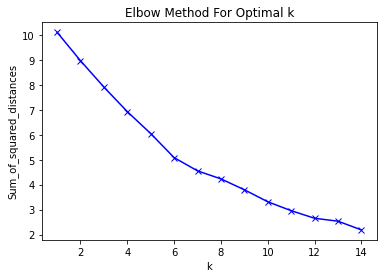

In [61]:
#Determine optimal k
combined_grouped_clustering = combined_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(combined_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
#Cluster neighbourhoods
# set number of clusters


kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0], dtype=int32)

In [63]:
singaporehk=[df_singapore, df_hongkong]
df_combined = pd.concat(singaporehk).reset_index(drop=True)
print(df_combined.shape)
df_combined

(74, 4)


City             Neighborhood   Latitude   Longitude
0   Singapore               Ang Mo Kio   1.370080  103.849523
1   Singapore                    Bedok   1.323976  103.930216
2   Singapore                   Bishan   1.350986  103.848255
3   Singapore                 Boon Lay   1.338550  103.705812
4   Singapore              Bukit Batok   1.349057  103.749591
5   Singapore              Bukit Merah   1.270439  103.828318
6   Singapore            Bukit Panjang   1.379149  103.761413
7   Singapore              Bukit Timah   1.354690  103.776372
8   Singapore  Central Water Catchment   1.375708  103.801743
9   Singapore                   Changi   1.351080  103.990064
10  Singapore               Changi Bay   1.316850  104.020649
11  Singapore            Choa Chu Kang   1.384749  103.744534
12  Singapore                 Clementi   1.315100  103.765231
13  Singapore            Downtown Core   1.287475  103.856033
14  Singapore                  Geylang   1.318186  103.887056
15  Singapore                  Hougang   1.370801  103.892544
16  Singapore              Jurong East   1.333108  103.742294
17  Singapore              Jurong West   1.339636  103.707339
18  Singapore                  Kallang   1.310759  103.866262
19  Singapore             Lim Chu Kang   1.434217  103.714987
20  Singapore                   Mandai   1.423535  103.803350
21  Singapore              Marina East   1.288624  103.869827
22  Singapore             Marina South   1.276998  103.861500
23  Singapore            Marine Parade   1.302689  103.907395
24  Singapore                   Museum   1.296052  103.847599
25  Singapore                   Newton   1.313183  103.838040
26  Singapore    North-Eastern Islands   1.382882  104.050726
27  Singapore                   Novena   1.320526  103.843881
28  Singapore                  Orchard   1.303427  103.831342
29  Singapore                   Outram   1.282870  103.837860
30  Singapore                Pasir Ris   1.373031  103.949255
31  Singapore               Paya Lebar   1.317480  103.892353
32  Singapore                  Pioneer   1.337588  103.697410
33  Singapore                  Punggol   1.405197  103.902350
34  Singapore               Queenstown   1.294623  103.806037
35  Singapore             River Valley   1.297582  103.836514
36  Singapore                   Rochor   1.303918  103.852789
37  Singapore                  Seletar   1.409849  103.877379
38  Singapore                Sembawang   1.449093  103.820055
39  Singapore                 Sengkang   1.391924  103.895491
40  Singapore                Serangoon   1.349761  103.873684
41  Singapore                  Simpang   1.445295  103.849743
42  Singapore          Singapore River   1.289178  103.845154
43  Singapore         Southern Islands   1.199182  103.760249
44  Singapore             Straits View   1.255708  103.862228
45  Singapore             Sungei Kadut   1.414997  103.753311
46  Singapore                 Tampines   1.354653  103.943571
47  Singapore                  Tanglin   1.306044  103.815280
48  Singapore                   Tengah   1.362453  103.725040
49  Singapore                Toa Payoh   1.335391  103.849741
50  Singapore                     Tuas   1.329372  103.648236
51  Singapore          Western Islands   1.250883  103.687883
52  Singapore  Western Water Catchment   1.366452  103.681031
53  Singapore                Woodlands   1.436897  103.786216
54  Singapore                   Yishun   1.429384  103.835028
55  Hong Kong      Central and Western  22.285016  114.158366
56  Hong Kong        Eastern Hong Kong  22.285016  114.158366
57  Hong Kong       Southern Hong Kong  22.219263  114.225230
58  Hong Kong                 Wan Chai  22.279015  114.172483
59  Hong Kong             Sham Shui Po  22.328190  114.160854
60  Hong Kong             Kowloon City  22.330160  114.189937
61  Hong Kong                Kwun Tong  22.312937  114.225610
62  Hong Kong             Wong Tai Sin  22.341654  114.193859
63  Hong Kong            Yau Tsim Mong  2

In [64]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

combined_merged = df_combined

# merge toronto_grouped with df_toronto_cleaned to add latitude/longitude for each neighborhood
combined_merged = combined_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

combined_merged.head()

City Neighborhood  Latitude   Longitude  Cluster Labels  \
0  Singapore   Ang Mo Kio  1.370080  103.849523             0.0   
1  Singapore        Bedok  1.323976  103.930216             0.0   
2  Singapore       Bishan  1.350986  103.848255             0.0   
3  Singapore     Boon Lay  1.338550  103.705812             0.0   
4  Singapore  Bukit Batok  1.349057  103.749591             0.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Food Court           Coffee Shop          Dessert Shop   
1           Coffee Shop    Chinese Restaurant            Food Court   
2            Food Court                  Café           Coffee Shop   
3   Japanese Restaurant      Asian Restaurant  Fast Food Restaurant   
4            Food Court           Coffee Shop    Chinese Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0      Asian Restaurant       Bubble Tea Shop           Snack Place   
1                  Café      Sushi Restaurant          Noodle House   
2       Bubble Tea Shop    Chinese Restaurant        Ice Cream Shop   
3    Chinese Restaurant           Coffee Shop                  Café   
4  Fast Food Restaurant           Supermarket              Bus Line   

  7th Most Common Venue 8th Most Common Venue          9th Most Common Venue  \
0           Bus Station    Chinese Restaurant  Vegetarian / Vegan Restaurant   
1                Bakery       Thai Restaurant               Asian Restaurant   
2   Japanese Restaurant               Stadium                    Bus Station   
3          Dessert Shop     Indian Restaurant           Gym / Fitness Center   
4              Bus Stop                  Café             Frozen Yogurt Shop   

  10th Most Common Venue  
0   Fast Food Restaurant  
1         Sandwich Place  
2       Asian Restaurant  
3             Food Court  
4             Restaurant

In [65]:
combined_merged['Cluster Labels']=combined_merged['Cluster Labels'].fillna(0).astype(int)
combined_merged

City             Neighborhood   Latitude   Longitude  Cluster Labels  \
0   Singapore               Ang Mo Kio   1.370080  103.849523               0   
1   Singapore                    Bedok   1.323976  103.930216               0   
2   Singapore                   Bishan   1.350986  103.848255               0   
3   Singapore                 Boon Lay   1.338550  103.705812               0   
4   Singapore              Bukit Batok   1.349057  103.749591               0   
5   Singapore              Bukit Merah   1.270439  103.828318               0   
6   Singapore            Bukit Panjang   1.379149  103.761413               0   
7   Singapore              Bukit Timah   1.354690  103.776372               0   
8   Singapore  Central Water Catchment   1.375708  103.801743               4   
9   Singapore                   Changi   1.351080  103.990064               0   
10  Singapore               Changi Bay   1.316850  104.020649               3   
11  Singapore            Choa Chu Kang   1.384749  103.744534               0   
12  Singapore                 Clementi   1.315100  103.765231               0   
13  Singapore            Downtown Core   1.287475  103.856033               0   
14  Singapore                  Geylang   1.318186  103.887056               0   
15  Singapore                  Hougang   1.370801  103.892544               0   
16  Singapore              Jurong East   1.333108  103.742294               0   
17  Singapore              Jurong West   1.339636  103.707339               0   
18  Singapore                  Kallang   1.310759  103.866262               0   
19  Singapore             Lim Chu Kang   1.434217  103.714987               0   
20  Singapore                   Mandai   1.423535  103.803350               0   
21  Singapore              Marina East   1.288624  103.869827               0   
22  Singapore             Marina South   1.276998  103.861500               0   
23  Singapore            Marine Parade   1.302689  103.907395               0   
24  Singapore                   Museum   1.296052  103.847599               0   
25  Singapore                   Newton   1.313183  103.838040               0   
26  Singapore    North-Eastern Islands   1.382882  104.050726               0   
27  Singapore                   Novena   1.320526  103.843881               0   
28  Singapore                  Orchard   1.303427  103.831342               0   
29  Singapore                   Outram   1.282870  103.837860               0   
30  Singapore                Pasir Ris   1.373031  103.949255               0   
31  Singapore               Paya Lebar   1.317480  103.892353               0   
32  Singapore                  Pioneer   1.337588  103.697410               0   
33  Singapore                  Punggol   1.405197  103.902350               0   
34  Singapore               Queenstown   1.294623  103.806037               0   
35  Singapore             River Valley   1.297582  103.836514               0   
36  Singapore                   Rochor   1.303918  103.852789               0   
37  Singapore                  Seletar   1.409849  103.877379               0   
38  Singapore                Sembawang   1.449093  103.820055               0   
39  Singapore                 Sengkang   1.391924  103.895491               0   
40  Singapore                Serangoon   1.349761  103.873684               0   
41  Singapore                  Simpang   1.445295  103.849743               0   
42  Singapore          Singapore River   1.289178  103.845154               0   
43  Singapore         Southern Islands   1.199182  103.760249               0   
44  Singapore             Straits View   1.255708  103.862228               3   
45  Singapore             Sungei Kadut   1.414997  103.753311               0   
46  Singapore                 Tampines   1.354653  103.943571               0   
47  Singapore                  Tanglin   1.306044  103.815280               0   
48  Singapore                   Tengah  

In [66]:
# create map
map_clusters_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['Latitude'], combined_merged['Longitude'], combined_merged['Neighborhood'], combined_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_singapore)
       
map_clusters_singapore

In [67]:
# create map
map_clusters_hongkong = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['Latitude'], combined_merged['Longitude'], combined_merged['Neighborhood'], combined_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_hongkong)
       
map_clusters_hongkong